In [359]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
# scale data

In [315]:
df = pd.read_pickle("./dataframe_with_target.pkl")

In [316]:
venture_df = pd.read_csv('top-investors-by-ipo-7-30-2019.csv')

In [317]:
df = df.rename(columns={"stability_measure": "target"})


In [318]:
cols = ['target']  + [col for col in df if col != 'target']
df = df[cols]

In [319]:
df['founded_date'] = pd.to_datetime(df['founded_date'], format='%Y-%m-%d')
df['last_funding_date'] = pd.to_datetime(df['last_funding_date'], format='%Y-%m-%d')
df['days_since_founded'] = (pd.to_datetime('now') - df['founded_date']).dt.days  
df['days_since_last_funding'] =  (pd.to_datetime('now') - df['last_funding_date']).dt.days

In [320]:
df['days_since_founded'] = df['days_since_founded'].fillna('')
df['days_since_last_funding'] = df['days_since_last_funding'].fillna('')


In [293]:
print(df.columns.get_loc("theodore_noriega"))
print(df.columns.get_loc("elon_musk"))

6502
84


In [321]:
df.drop(df.iloc[:, 84:6502], inplace=True, axis=1)


In [295]:
df['target'].value_counts()

0    18373
1      256
Name: target, dtype: int64

In [322]:
df['days_since_founded'].head()

0    1125
1    1002
2    1213
3    1216
4    1276
Name: days_since_founded, dtype: int64

In [323]:
df.shape

(18629, 109)

In [324]:
df = df.drop(columns=['post_ipo_debt', 'total_funding_amount_currency','total_funding_amount_currency_(in_usd)'
                  ,'total_funding_amount_currency','total_funding_amount_currency_(in_usd)'
                  ,'total_equity_funding_amount_currency','total_equity_funding_amount_currency_(in_usd)'
                  ,'number_of_employees','number_of_events','number_of_exits','number_of_exits_(ipo)'
                  ,'last_funding_amount_currency','last_funding_amount_currency_(in_usd)', 'last_funding_type'
                  ,'last_equity_funding_amount_currency','last_equity_funding_amount_currency_(in_usd)'
                  ,'funding_status','headquarters_location','organization_name','description','founded_date'
                , 'last_equity_funding_amount','last_funding_date','last_funding_date','founders'
                ,'ipo_status','categories','category_groups','company_type','series_H_round'
                      ,'series_I_round','private_equity','post_ipo_equity','ipo_date'
                      ,'investment_stage','last_equity_funding_type','total_equity_funding_amount'
                      ,'founded_date','operating_status','series_d_round','series_E_round'
                      ,'series_F_round','series_G_round'])


In [325]:
df = df.drop(columns=['theodore_noriega',
 'practica_capital',
 'dave_goldberg',
 'innogest_capital',
 'paul_wilson',
 'backed_vc',
 'enterprise_angels',
 'dachshund_labs',
 'vesuvius_ventures',
 'solar_plus_international',
 'samir_bangara',
 'monogram_ventures',
 'terell_sterling',
 'ohad_gliksman',])

In [326]:
df['number_of_founders'] = df['number_of_founders'].fillna(df['number_of_founders'].mean())

In [327]:
df['number_of_founders'].unique()

array([ 1.       ,  3.       ,  4.       ,  2.       ,  5.       ,
        1.9797756,  9.       ,  6.       ,  7.       , 13.       ,
        8.       , 11.       , 10.       ])

In [328]:
df.shape

(18629, 56)

# Add Venture weight


In [330]:
venture_df = venture_df.drop(df.index[101:795])

In [331]:
df['top_5_investors'] = df['top_5_investors'].astype(str)

In [332]:
df['list_of_investors'] = df['top_5_investors'].apply(lambda x: x[0:].split(','))


In [333]:
venture_list = list(venture_df['Organization/Person Name'])

In [334]:
df['top_100_count'] = df['list_of_investors'].apply(helper_function)
df['top_100_count'].value_counts()

0    17933
1      696
Name: top_100_count, dtype: int64

In [335]:
def helper_function(list_of_investors):
    top_100_count = 0
    for investor in list_of_investors:
        if investor in venture_list:
            top_100_count += 1
    return top_100_count

In [337]:
df = df.drop(columns=['list_of_investors','top_5_investors'])

# Final DataFrame

In [349]:
df2 = df.copy()

In [ ]:
df2.dropna(subset=['last_funding_amount'])

In [355]:
df2.to_pickle('./raw_data.pkl')

In [356]:
df = pd.read_pickle("./raw_data.pkl")

## Check Correlation Matrix

In [357]:
corr = df.corr()

<Figure size 2160x2160 with 0 Axes>

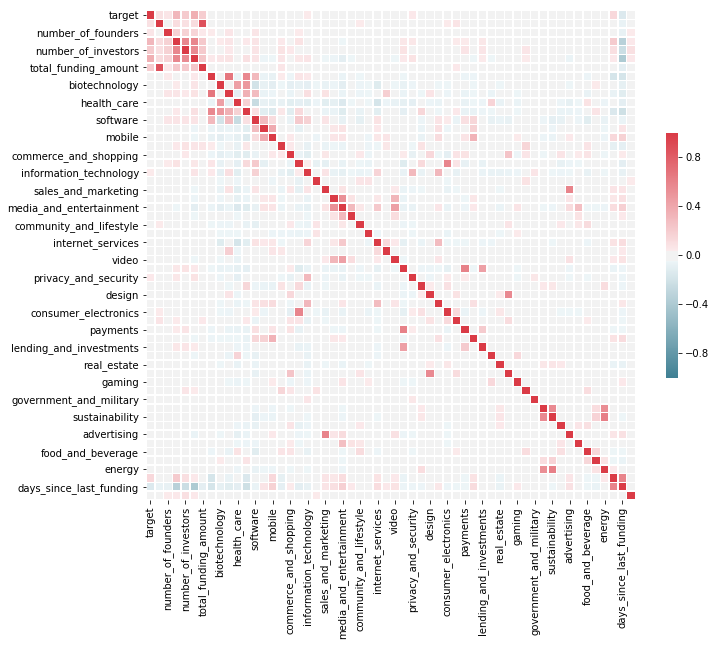

In [368]:
plt.figure(figsize=(30,30))
# Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

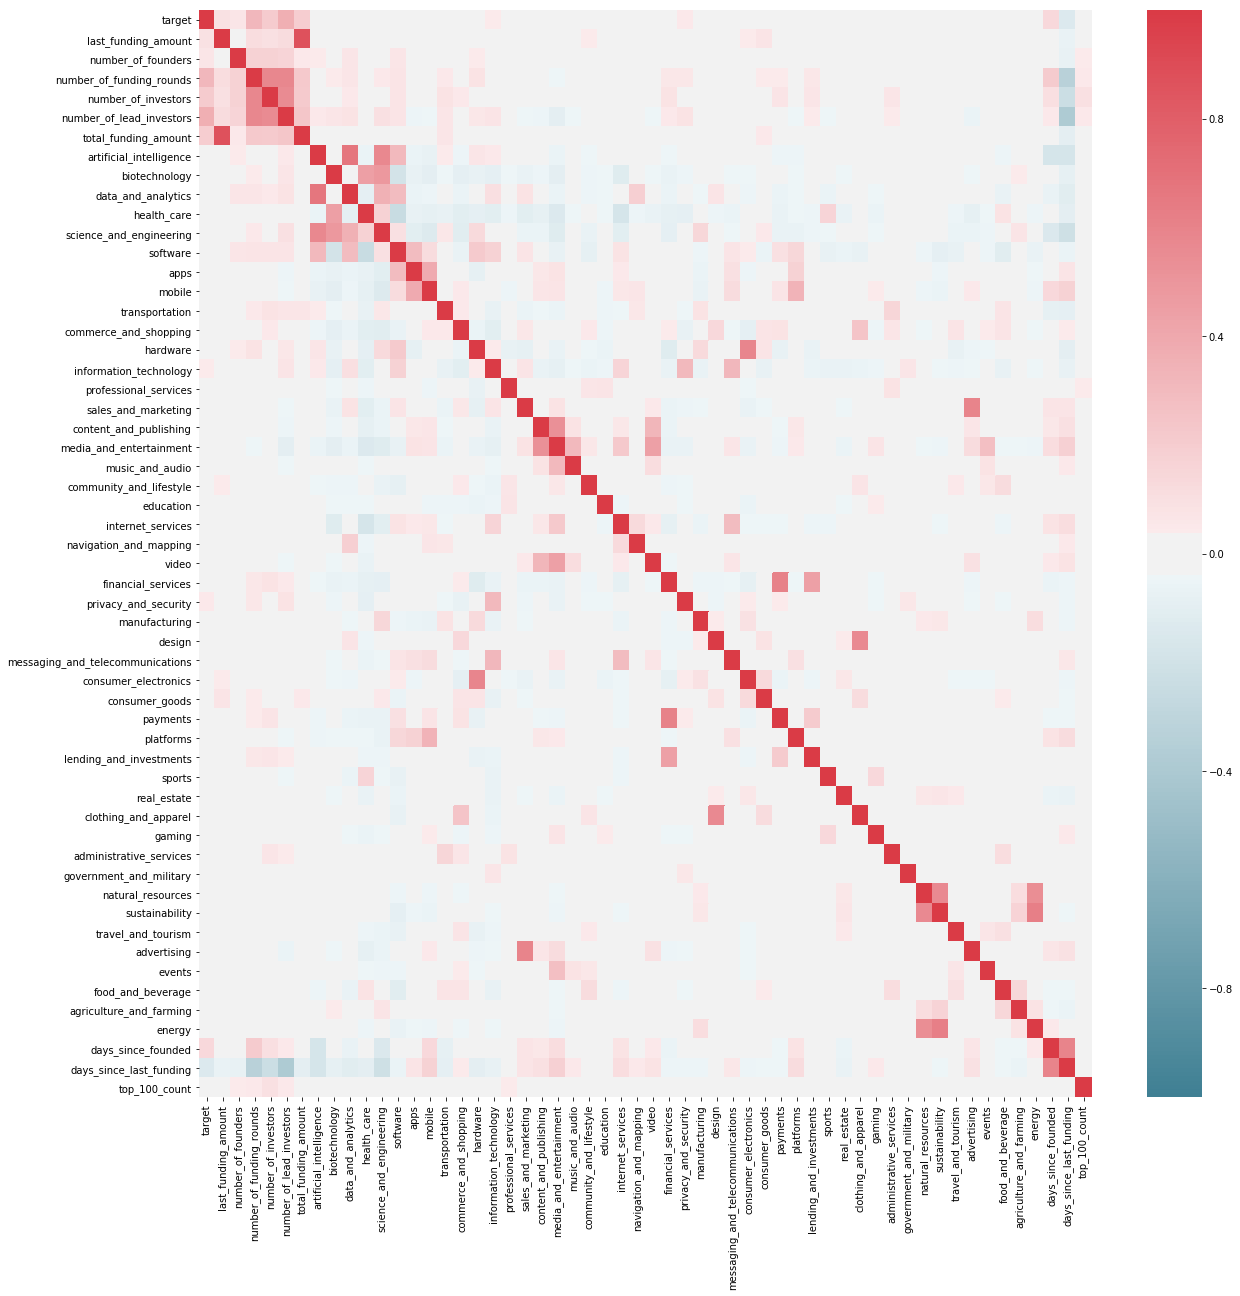

In [370]:
plt.subplots(figsize=(20, 20))

sns.heatmap(corr, cmap=cmap, vmax=1, vmin = -1)

In [373]:
df['mobile'].value_counts()

0.0    5848
1.0    1397
Name: mobile, dtype: int64